In [20]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.3.4
2.6.3


In [3]:
experiments_path = './data/test_experiments.csv'
experiments = pd.read_csv(experiments_path)

In [15]:
outcomes_path = './data/test_outcomes.csv'
outcomes = pd.read_csv(outcomes_path)
outcomes

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.633473e+08,0.0,1.676131e+08,0.000000,1.675704e+08,0.000000,6.563970e+07,0.000000,1.399739e+08,0.000538,1.268900e+09,354.219166
1,1.633473e+08,0.0,1.780293e+08,0.000914,1.675704e+08,0.000000,6.563970e+07,0.000000,1.335037e+08,0.000000,1.268900e+09,491.005131
2,1.633473e+08,0.0,1.676131e+08,0.000000,1.675704e+08,0.000000,6.563970e+07,0.000000,1.548460e+08,0.003463,1.268900e+09,2352.389925
3,1.633473e+08,0.0,1.676131e+08,0.000000,1.675704e+08,0.000000,7.093972e+07,0.000286,1.965636e+08,0.006481,1.268900e+09,5155.465039
4,1.633473e+08,0.0,1.676131e+08,0.000000,1.675704e+08,0.000000,6.563970e+07,0.000000,1.346373e+08,0.000187,1.268900e+09,123.062430
5,2.095323e+08,0.0,3.263082e+08,0.000000,6.673235e+07,0.008416,4.986648e+07,0.000000,8.895480e+07,0.000000,8.623000e+08,296.319709
6,2.095323e+08,0.0,3.263082e+08,0.000000,5.096240e+07,0.000000,4.986648e+07,0.000000,8.895480e+07,0.000000,8.623000e+08,0.000000
7,2.095323e+08,0.0,3.263082e+08,0.000000,5.096240e+07,0.000000,4.986648e+07,0.000000,8.895480e+07,0.000000,8.623000e+08,0.000000
8,2.095323e+08,0.0,3.263082e+08,0.000000,5.096240e+07,0.000000,4.986648e+07,0.000000,8.895480e+07,0.000000,8.623000e+08,0.000000
9,2.095323e+08,0.0,3.263082e+08,0.000000,5.096240e+07,0.000000,4.986648e+07,0.000000,8.895480e+07,0.000000,8.623000e+08,0.000000


In [22]:
outcomes = np.array(outcomes)
outcomes

array([[1.63347299e+08, 0.00000000e+00, 1.67613098e+08, 0.00000000e+00,
        1.67570370e+08, 0.00000000e+00, 6.56396980e+07, 0.00000000e+00,
        1.39973871e+08, 5.37545192e-04, 1.26890000e+09, 3.54219166e+02],
       [1.63347299e+08, 0.00000000e+00, 1.78029280e+08, 9.13903321e-04,
        1.67570370e+08, 0.00000000e+00, 6.56396980e+07, 0.00000000e+00,
        1.33503669e+08, 0.00000000e+00, 1.26890000e+09, 4.91005131e+02],
       [1.63347299e+08, 0.00000000e+00, 1.67613098e+08, 0.00000000e+00,
        1.67570370e+08, 0.00000000e+00, 6.56396980e+07, 0.00000000e+00,
        1.54846000e+08, 3.46315450e-03, 1.26890000e+09, 2.35238993e+03],
       [1.63347299e+08, 0.00000000e+00, 1.67613098e+08, 0.00000000e+00,
        1.67570370e+08, 0.00000000e+00, 7.09397232e+07, 2.86365690e-04,
        1.96563593e+08, 6.48087567e-03, 1.26890000e+09, 5.15546504e+03],
       [1.63347299e+08, 0.00000000e+00, 1.67613098e+08, 0.00000000e+00,
        1.67570370e+08, 0.00000000e+00, 6.56396980e+07, 0.00

In [5]:
uncer = experiments.iloc[:,0:19]
uncer

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,13,193.371688,10.0,0.594189,314.802175,10.0,0.841356,80.035522,1.5,0.093501,105.575131,10.0,0.785491,33.966232,1.0,0.593467,1.5,2.5,2.5
1,131,90.604136,1.0,0.143965,92.660527,10.0,0.152886,250.084929,1.5,0.811378,293.057453,1.5,0.282569,197.608379,1.5,0.909682,1.5,1.5,2.5
2,57,305.728902,1.5,0.231278,137.605255,1.5,0.466082,286.862402,1.5,0.467798,215.614338,1.5,0.939964,141.804479,10.0,0.223408,4.5,4.5,4.5
3,95,106.196279,10.0,0.790449,210.225438,1.0,0.385016,186.913666,1.0,0.709866,230.143803,10.0,0.026525,280.602421,10.0,0.109558,2.5,3.5,1.5
4,38,274.740877,1.5,0.980075,279.286588,1.0,0.761153,146.868507,10.0,0.370117,75.040590,1.0,0.486040,290.472544,1.5,0.675588,4.5,2.5,3.5
5,13,193.371688,10.0,0.594189,314.802175,10.0,0.841356,80.035522,1.5,0.093501,105.575131,10.0,0.785491,33.966232,1.0,0.593467,1.5,2.5,2.5
6,131,90.604136,1.0,0.143965,92.660527,10.0,0.152886,250.084929,1.5,0.811378,293.057453,1.5,0.282569,197.608379,1.5,0.909682,1.5,1.5,2.5
7,57,305.728902,1.5,0.231278,137.605255,1.5,0.466082,286.862402,1.5,0.467798,215.614338,1.5,0.939964,141.804479,10.0,0.223408,4.5,4.5,4.5
8,95,106.196279,10.0,0.790449,210.225438,1.0,0.385016,186.913666,1.0,0.709866,230.143803,10.0,0.026525,280.602421,10.0,0.109558,2.5,3.5,1.5
9,38,274.740877,1.5,0.980075,279.286588,1.0,0.761153,146.868507,10.0,0.370117,75.040590,1.0,0.486040,290.472544,1.5,0.675588,4.5,2.5,3.5


In [18]:
lev = experiments.iloc[:,19:]
RfR_lev = lev.loc[:,['0_RfR 0', '1_RfR 0', '2_RfR 0', '3_RfR 0', '4_RfR 0']]
lev

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0,1,1,0,1,1,1,0,0,0,...,4,10,10,1,10,4,4,23,21,dikesnet
1,0,1,1,0,1,1,1,0,0,0,...,4,10,10,1,10,4,4,24,21,dikesnet
2,0,1,1,0,1,1,1,0,0,0,...,4,10,10,1,10,4,4,25,21,dikesnet
3,0,1,1,0,1,1,1,0,0,0,...,4,10,10,1,10,4,4,26,21,dikesnet
4,0,1,1,0,1,1,1,0,0,0,...,4,10,10,1,10,4,4,27,21,dikesnet
5,1,0,0,1,0,0,0,1,1,1,...,10,5,3,5,0,7,1,23,22,dikesnet
6,1,0,0,1,0,0,0,1,1,1,...,10,5,3,5,0,7,1,24,22,dikesnet
7,1,0,0,1,0,0,0,1,1,1,...,10,5,3,5,0,7,1,25,22,dikesnet
8,1,0,0,1,0,0,0,1,1,1,...,10,5,3,5,0,7,1,26,22,dikesnet
9,1,0,0,1,0,0,0,1,1,1,...,10,5,3,5,0,7,1,27,22,dikesnet


#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

print(results)

In [16]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes["A.1_Expected Number of Deaths"] < 2.5e+08
prim_alg = prim.Prim(x, y, threshold=0.8)
#think the issue is that y is the wrong data type, should be an array instead of a table...?
box1 = prim_alg.find_box()

AssertionError: 

In [12]:
x

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,13,193.371688,10.0,0.594189,314.802175,10.0,0.841356,80.035522,1.5,0.093501,105.575131,10.0,0.785491,33.966232,1.0,0.593467,1.5,2.5,2.5
1,131,90.604136,1.0,0.143965,92.660527,10.0,0.152886,250.084929,1.5,0.811378,293.057453,1.5,0.282569,197.608379,1.5,0.909682,1.5,1.5,2.5
2,57,305.728902,1.5,0.231278,137.605255,1.5,0.466082,286.862402,1.5,0.467798,215.614338,1.5,0.939964,141.804479,10.0,0.223408,4.5,4.5,4.5
3,95,106.196279,10.0,0.790449,210.225438,1.0,0.385016,186.913666,1.0,0.709866,230.143803,10.0,0.026525,280.602421,10.0,0.109558,2.5,3.5,1.5
4,38,274.740877,1.5,0.980075,279.286588,1.0,0.761153,146.868507,10.0,0.370117,75.040590,1.0,0.486040,290.472544,1.5,0.675588,4.5,2.5,3.5
5,13,193.371688,10.0,0.594189,314.802175,10.0,0.841356,80.035522,1.5,0.093501,105.575131,10.0,0.785491,33.966232,1.0,0.593467,1.5,2.5,2.5
6,131,90.604136,1.0,0.143965,92.660527,10.0,0.152886,250.084929,1.5,0.811378,293.057453,1.5,0.282569,197.608379,1.5,0.909682,1.5,1.5,2.5
7,57,305.728902,1.5,0.231278,137.605255,1.5,0.466082,286.862402,1.5,0.467798,215.614338,1.5,0.939964,141.804479,10.0,0.223408,4.5,4.5,4.5
8,95,106.196279,10.0,0.790449,210.225438,1.0,0.385016,186.913666,1.0,0.709866,230.143803,10.0,0.026525,280.602421,10.0,0.109558,2.5,3.5,1.5
9,38,274.740877,1.5,0.980075,279.286588,1.0,0.761153,146.868507,10.0,0.370117,75.040590,1.0,0.486040,290.472544,1.5,0.675588,4.5,2.5,3.5


In [ ]:
out = arcpy.da.TableToNumPyArray(input, (field1, field2))TableToNumPyArray(outcomes)

In [13]:
type(y)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: A.1 Total Costs, dtype: bool

In [ ]:

box1.show_tradeoff()
plt.show()

C:\Users\python\anaconda3\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:423: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


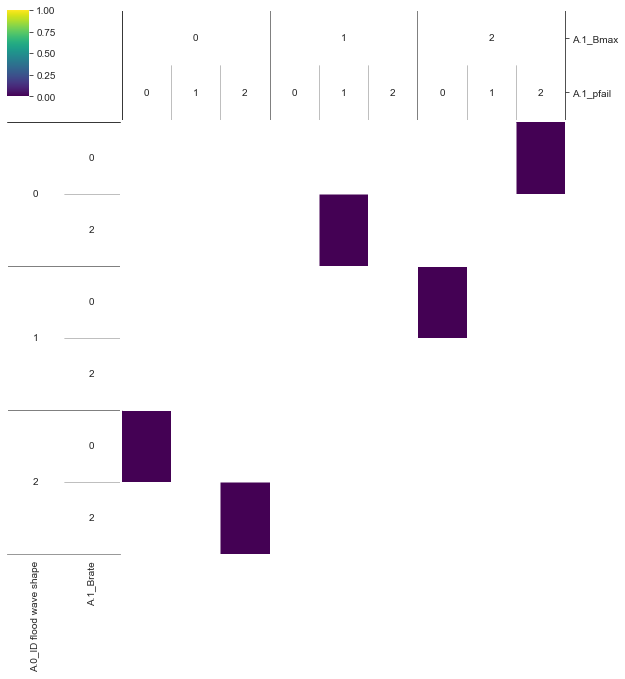

In [9]:
from ema_workbench.analysis import dimensional_stacking

x = uncer
y = outcomes["A.2 Total Costs"] < 1
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

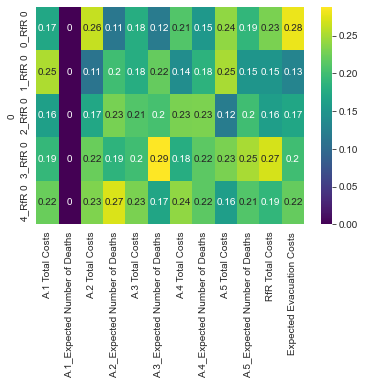

<Figure size 1080x576 with 0 Axes>

In [17]:
from ema_workbench.analysis import feature_scoring

x = lev
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True,)
plt.figure(figsize = (15,8))
plt.show()

In [10]:
box1.select(3)
fig = box1.show_pairs_scatter()
#fig.set_size_inches((12,12)) #this creates an error
plt.show()

NameError: name 'box1' is not defined